In [334]:
#This Data Wrangling model will help display the data of the different Indexes per US City and how affordable they are compared to the Benchmark of New York, NY. This will help guide the management team of City Owl Partners to decide where the best relocation city would be for the firm

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [336]:
df = pd.read_csv('costofliving.csv')

In [337]:
print(df)

              City State     Region            Division        Country  \
0         New York    NY  Northeast     Middle Atlantic  United States   
1    San Francisco    CA       West             Pacific  United States   
2         Honolulu    HI       West             Pacific  United States   
3        Anchorage    AK       West             Pacific  United States   
4         Brooklyn    NY  Northeast     Middle Atlantic  United States   
..             ...   ...        ...                 ...            ...   
105     Huntsville    AL      South  East South Central  United States   
106      Lexington    KY      South  East South Central  United States   
107          Boise    ID       West            Mountain  United States   
108        El Paso    TX      South  West South Central  United States   
109    San Antonio    TX      South  West South Central  United States   

     Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                  100.00      100.00 

In [338]:
df.head()

,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,New York,NY,Northeast,Middle Atlantic,United States,100.00,100.00,100.00,100.00,100.00,100.00
1,San Francisco,CA,West,Pacific,United States,96.88,106.49,101.43,101.93,94.58,125.95
2,Honolulu,HI,West,Pacific,United States,93.72,63.96,79.63,96.32,86.72,113.58
3,Anchorage,AK,West,Pacific,United States,93.19,39.45,67.75,96.74,78.76,138.38
4,Brooklyn,NY,Northeast,Middle Atlantic,United States,90.31,81.02,85.91,83.16,95.27,87.05


In [339]:
#Filter the data to find the benchmark City and display just the row for the benchmark city (New York, NY)
df[df.City == 'New York'].transpose

<bound method DataFrame.transpose of        City State     Region         Division        Country  \
0  New York    NY  Northeast  Middle Atlantic  United States   

   Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                 100.0       100.0                           100.0   

   Groceries Index  Restaurant Price Index  Local Purchasing Power Index  
0            100.0                   100.0                         100.0  >

In [340]:
city_data['State'].value_counts().head()

CA    13
FL     9
TX     8
WA     8
NY     6
Name: State, dtype: int64

In [341]:
city_data['City'].value_counts().head()

Portland       2
Springfield    1
Hartford       1
Charleston     1
Saint Paul     1
Name: City, dtype: int64

In [342]:
(city_data['City'] + ', ' + city_data['State']).value_counts().head()

Springfield, MO    1
Hartford, CT       1
Charleston, SC     1
Saint Paul, MN     1
Sacramento, CA     1
dtype: int64

In [343]:
city_data[['Region', 'State']].nunique()

Region     4
State     41
dtype: int64

In [344]:
(city_data.Region != city_data.State).sum()

110

In [345]:
city_data['Region'].value_counts()

South        41
West         35
Midwest      21
Northeast    13
Name: Region, dtype: int64

In [346]:
(city_data[city_data.Region != city_data.State].groupby('State')['Region'].value_counts())

State  Region   
AK     West          1
AL     South         2
AR     South         2
AZ     West          2
CA     West         13
CO     West          2
CT     Northeast     1
DC     South         1
FL     South         9
GA     South         1
HI     West          1
IA     Midwest       1
ID     West          1
IL     Midwest       2
IN     Midwest       2
KS     Midwest       1
KY     South         2
LA     South         1
MA     Northeast     1
MD     South         1
ME     Northeast     1
MI     Midwest       3
MN     Midwest       2
MO     Midwest       3
NC     South         4
NJ     Northeast     1
NM     West          1
NV     West          2
NY     Northeast     6
OH     Midwest       5
OK     South         2
OR     West          3
PA     Northeast     2
SC     South         2
TN     South         4
TX     South         8
UT     West          1
VA     South         2
VT     Northeast     1
WA     West          8
WI     Midwest       2
Name: Region, dtype: int64

array([[<AxesSubplot:title={'center':'Cost of Living Index'}>,
        <AxesSubplot:title={'center':'Rent Index'}>],
       [<AxesSubplot:title={'center':'Cost of Living Plus Rent Index'}>,
        <AxesSubplot:title={'center':'Groceries Index'}>],
       [<AxesSubplot:title={'center':'Restaurant Price Index'}>,
        <AxesSubplot:title={'center':'Local Purchasing Power Index'}>]],
      dtype=object)

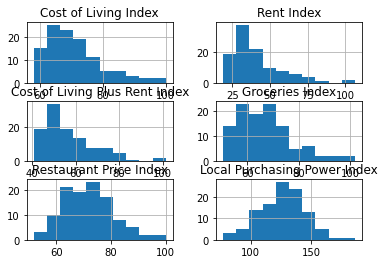

In [347]:
city_data.hist()

In [348]:
city_data.sort_values('Cost of Living Index', ascending=False).head(5)

,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,New York,NY,Northeast,Middle Atlantic,United States,100.00,100.00,100.00,100.00,100.00,100.00
1,San Francisco,CA,West,Pacific,United States,96.88,106.49,101.43,101.93,94.58,125.95
2,Honolulu,HI,West,Pacific,United States,93.72,63.96,79.63,96.32,86.72,113.58
3,Anchorage,AK,West,Pacific,United States,93.19,39.45,67.75,96.74,78.76,138.38
4,Brooklyn,NY,Northeast,Middle Atlantic,United States,90.31,81.02,85.91,83.16,95.27,87.05


In [349]:
city_data.sort_values('Cost of Living Index', ascending=True).head(5)

,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
109,San Antonio,TX,South,West South Central,United States,58.12,31.26,45.41,55.20,52.09,150.96
108,El Paso,TX,South,West South Central,United States,59.37,22.16,41.76,54.07,59.41,131.70
107,Boise,ID,West,Mountain,United States,59.43,30.85,45.90,50.93,63.79,120.44
106,Lexington,KY,South,East South Central,United States,59.64,24.86,43.17,54.50,60.08,141.91
105,Huntsville,AL,South,East South Central,United States,59.80,28.65,45.06,58.83,60.20,162.04


In [350]:
city_data.sort_values('Rent Index', ascending=False).head(5)


,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,San Francisco,CA,West,Pacific,United States,96.88,106.49,101.43,101.93,94.58,125.95
0,New York,NY,Northeast,Middle Atlantic,United States,100.00,100.00,100.00,100.00,100.00,100.00
4,Brooklyn,NY,Northeast,Middle Atlantic,United States,90.31,81.02,85.91,83.16,95.27,87.05
12,Oakland,CA,West,Pacific,United States,81.18,77.14,79.27,77.54,78.55,137.74
22,San Jose,CA,West,Pacific,United States,76.28,76.61,76.43,71.10,83.14,170.91


In [351]:
city_data.sort_values('Rent Index', ascending=True).head(5)

,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
99,Springfield,MO,Midwest,West North Central,United States,60.56,18.66,40.73,60.68,61.21,102.88
101,Toledo,OH,Midwest,East North Central,United States,60.35,21.26,41.84,50.89,55.69,125.57
73,Fort Wayne,IN,Midwest,East North Central,United States,65.88,21.74,44.98,70.07,63.82,124.37
74,Dayton,OH,Midwest,East North Central,United States,65.84,21.97,45.07,62.60,64.97,91.21
108,El Paso,TX,South,West South Central,United States,59.37,22.16,41.76,54.07,59.41,131.70


In [352]:
city_data.sort_values('Cost of Living Plus Rent Index', ascending=False).head(5)


,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,San Francisco,CA,West,Pacific,United States,96.88,106.49,101.43,101.93,94.58,125.95
0,New York,NY,Northeast,Middle Atlantic,United States,100.00,100.00,100.00,100.00,100.00,100.00
4,Brooklyn,NY,Northeast,Middle Atlantic,United States,90.31,81.02,85.91,83.16,95.27,87.05
10,Berkeley,CA,West,Pacific,United States,84.09,76.39,80.45,81.99,87.60,119.03
5,Washington,DC,South,South Atlantic,United States,88.50,70.28,79.87,86.63,86.23,131.53


In [353]:
city_data.sort_values('Cost of Living Plus Rent Index', ascending=True).head(5)

,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
99,Springfield,MO,Midwest,West North Central,United States,60.56,18.66,40.73,60.68,61.21,102.88
108,El Paso,TX,South,West South Central,United States,59.37,22.16,41.76,54.07,59.41,131.70
101,Toledo,OH,Midwest,East North Central,United States,60.35,21.26,41.84,50.89,55.69,125.57
106,Lexington,KY,South,East South Central,United States,59.64,24.86,43.17,54.50,60.08,141.91
102,Little Rock,AR,South,West South Central,United States,60.31,26.40,44.26,55.44,63.52,144.07


In [354]:
city_data.sort_values('Groceries Index', ascending=False).head(5)

,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,San Francisco,CA,West,Pacific,United States,96.88,106.49,101.43,101.93,94.58,125.95
0,New York,NY,Northeast,Middle Atlantic,United States,100.00,100.00,100.00,100.00,100.00,100.00
3,Anchorage,AK,West,Pacific,United States,93.19,39.45,67.75,96.74,78.76,138.38
2,Honolulu,HI,West,Pacific,United States,93.72,63.96,79.63,96.32,86.72,113.58
7,Charleston,SC,South,South Atlantic,United States,86.87,46.12,67.58,90.86,73.48,106.06


In [355]:
city_data.sort_values('Groceries Index', ascending=True).head(5)

,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
100,Vancouver,WA,West,Pacific,United States,60.46,35.97,48.87,50.54,61.81,153.07
101,Toledo,OH,Midwest,East North Central,United States,60.35,21.26,41.84,50.89,55.69,125.57
107,Boise,ID,West,Mountain,United States,59.43,30.85,45.90,50.93,63.79,120.44
104,Reno,NV,West,Mountain,United States,59.84,38.03,49.51,51.96,62.27,136.81
93,Cincinnati,OH,Midwest,East North Central,United States,62.65,31.03,47.68,52.40,63.41,137.31


In [356]:
city_data.sort_values('Restaurant Price Index', ascending=False).head(5)

,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,New York,NY,Northeast,Middle Atlantic,United States,100.00,100.00,100.00,100.00,100.00,100.00
4,Brooklyn,NY,Northeast,Middle Atlantic,United States,90.31,81.02,85.91,83.16,95.27,87.05
1,San Francisco,CA,West,Pacific,United States,96.88,106.49,101.43,101.93,94.58,125.95
26,Santa Barbara,CA,West,Pacific,United States,75.55,68.66,72.29,67.52,91.99,124.41
10,Berkeley,CA,West,Pacific,United States,84.09,76.39,80.45,81.99,87.60,119.03


In [357]:
city_data.sort_values('Restaurant Price Index', ascending=True).head(5)

,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
91,Detroit,MI,Midwest,East North Central,United States,62.77,34.22,49.25,56.21,51.65,97.41
109,San Antonio,TX,South,West South Central,United States,58.12,31.26,45.41,55.20,52.09,150.96
101,Toledo,OH,Midwest,East North Central,United States,60.35,21.26,41.84,50.89,55.69,125.57
97,Oklahoma City,OK,South,West South Central,United States,61.72,25.72,44.68,60.18,56.84,136.21
83,Gainesville,FL,South,South Atlantic,United States,63.62,29.02,47.24,60.52,58.47,106.34


In [358]:
city_data.sort_values('Local Purchasing Power Index', ascending=False).head(5)

,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
8,Bellevue,WA,West,Pacific,United States,85.97,61.20,74.24,78.24,82.29,186.00
22,San Jose,CA,West,Pacific,United States,76.28,76.61,76.43,71.10,83.14,170.91
105,Huntsville,AL,South,East South Central,United States,59.80,28.65,45.06,58.83,60.20,162.04
62,Virginia Beach,VA,South,South Atlantic,United States,67.86,35.84,52.70,62.06,71.73,161.28
56,Raleigh,NC,South,South Atlantic,United States,69.18,36.18,53.56,71.88,66.40,155.96


In [323]:
city_data.sort_values('Local Purchasing Power Index', ascending=True).head(5)

,City,State,Region,Division,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
23,Burlington,VT,Northeast,New England,United States,76.11,41.81,59.87,73.17,78.69,76.97
14,Hartford,CT,Northeast,New England,United States,79.85,41.58,61.73,83.41,72.82,84.71
4,Brooklyn,NY,Northeast,Middle Atlantic,United States,90.31,81.02,85.91,83.16,95.27,87.05
25,Miami,FL,South,South Atlantic,United States,75.83,57.81,67.30,67.27,81.89,89.99
52,Rochester,NY,Northeast,Middle Atlantic,United States,70.25,30.81,51.58,69.88,71.98,91.12


In [362]:
df.shape

(110, 11)